# Сборный проект №1

**Успешность игр интернет магазина "Стримчик"**

*Основные цели проекта:*
- Открыть, изучить и предобработать данные
- Проанализировать данные:
    - Выявить актуальный период (актуальный для данного исследования)
    - Проанализировать распределения по платформам и жанрам
    - Составить портрет пользователей по регионам
    - Проверить 2 гипотезы

**Актуальность данных определяется пользой для выстраивания предсказаний на 2017 год!**



"Словарь":
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Данные

Откроем данные, посмотрим на основную информацию

In [2]:
data = pd.read_csv('games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

### Названия стобцов

Есть проблема с названиями столбцов - все слова начинаются с большой буквы. Исправим это

In [4]:
data.columns = np.char.lower(data.columns.to_numpy(dtype=str))
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразования типа данных

Преобразуем столбец с годом в тип int (год - это целочисленное значение)

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

Рассмотрим столбец с оценками от критиков:

In [6]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Судя по всему рейтинг от критиков записан по стобальной шкале, поэтому преобразуем столбец с этим рейтингов в int

In [7]:
data['critic_score'] = data['critic_score'].astype('Int64')

Рассмотрим user_score

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец с рейтингом от пользователей имеет тип object. Все дело в том, что некоторые пользователи выставляют рейтинг "tbd" (To be determened - подлежит уточнению). Поэтому предобработку данного столбца лучше провести в разделе обработки пропусков

### Обработка пропусков

Дадим безымянным играм название "Undefined"

In [9]:
data['name'] = data['name'].fillna('Undefined')

Проделаем тоже самое с жанром

In [10]:
data['genre'] = data['genre'].fillna('Undefined')

С пропусками в стобце с годом выпуска ничего сделать не получится. Такие пропуски могли возникнуть из-за человеческого фактора (забыли поставить дату) или из-за того, что игра мультиплатформенная и дата стоит только для одной из платформ
Уберем эти данные, поскольку нам нужны только игры с актуальным годом выпуска

In [11]:
data = data.drop(data[data['year_of_release'].isna()].index, axis=0)

Пропуски с рейтингами тоже не получится заполнить, чтобы не исказить данные. Причин пропусков может быть несколько - малая популярность игры, игра очень свежая и так далее.

Пропуски в возрастном рейтинге можно заполнить значение "Undefined". Пропуски можно объяснить так же. Либо пропуски можно еще списать на то, что игра выходила только в определенных регионах, где не используется система ESRB.

In [12]:
data['rating'] = data['rating'].fillna('Undefined')

Как было замечено ранее, в столбце с рейтингами пользователей есть оценки типа 'tbd'. Чаще всего это значит, что пользователь решил выставить рейтинг позже. Поэтому разумно будет убрать такие значения, после чего можно будет поменять тип на float

In [13]:
data['user_score'] = data['user_score'].apply(lambda x: None if x == 'tbd' else x)
data['user_score'] = data['user_score'].astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16446 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.5+ MB


#### Проверка дубликатов

In [15]:
data[data.duplicated()]['name'].count()

0

In [16]:
sorted(data['platform'].unique())

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

Дубликатов нет

### Суммарные продажи

Запишем суммарные продажи в отдельный столбец

In [17]:
data['sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,Undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,Undefined,31.38


### Итоги предобработки

Была проведена предобработка данных:
- Исправлены названия столбцов
- Изменены типы данных стоолбцов, где это нужно
- Убраны некоторые пропуски
- Добавлен столбец с суммарными продажами

## Анализ данных

### Распределение по годам

Найдем наиболее актуальные периды

<AxesSubplot:title={'center':'График количества игр от года выпуска'}, xlabel='year_of_release'>

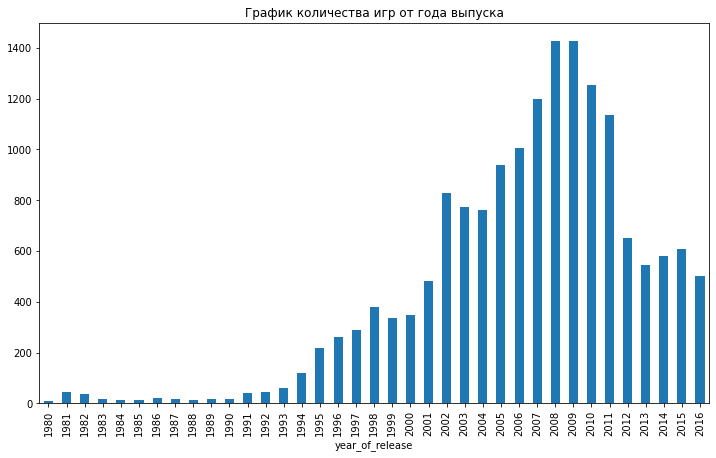

In [18]:
data.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(12,7), title='График количества игр от года выпуска')

С 1993 года мы видим резкое возрастание количества выпущенных игр. В 2008 - пиковок количество, далее происходит спад.

Изучим топ платформ по продажам, после чего для каждой рассмотрим такое распределение продаж по годам

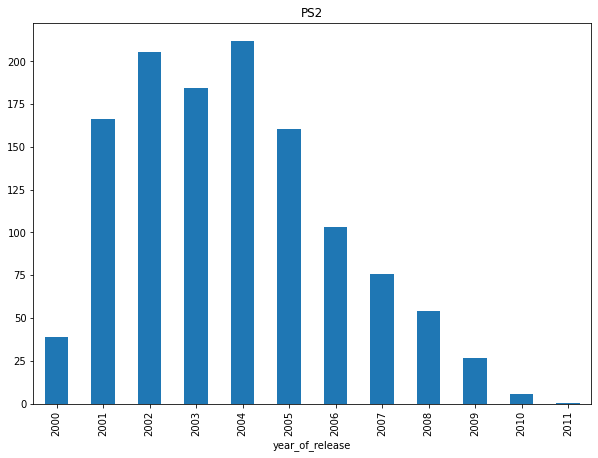

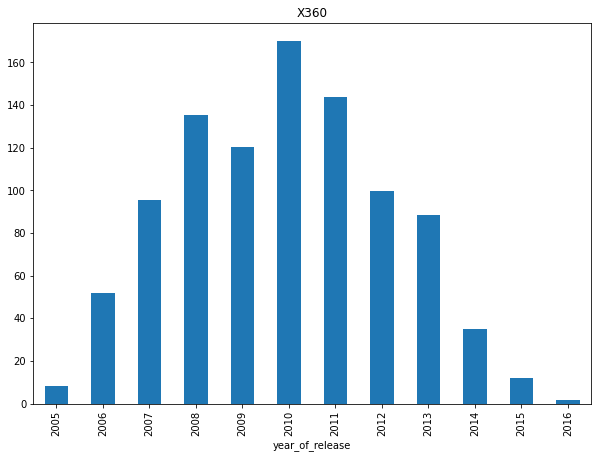

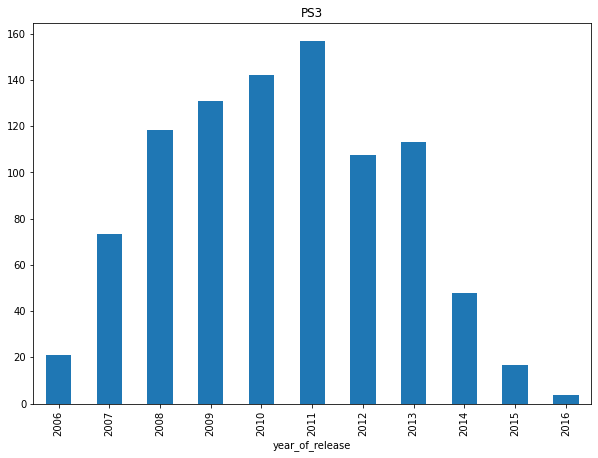

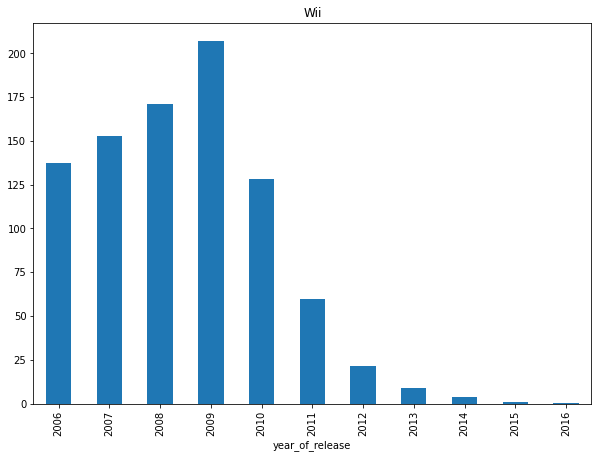

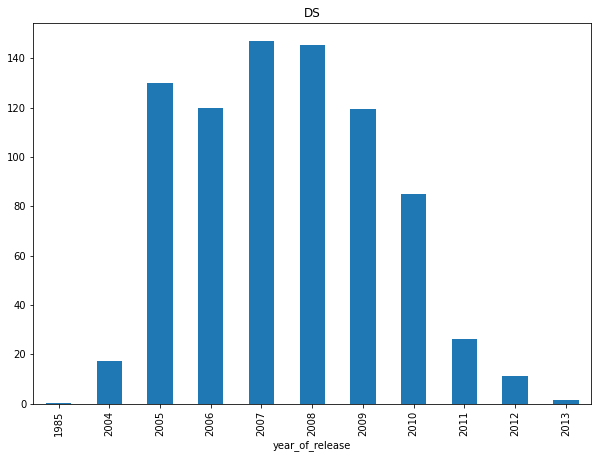

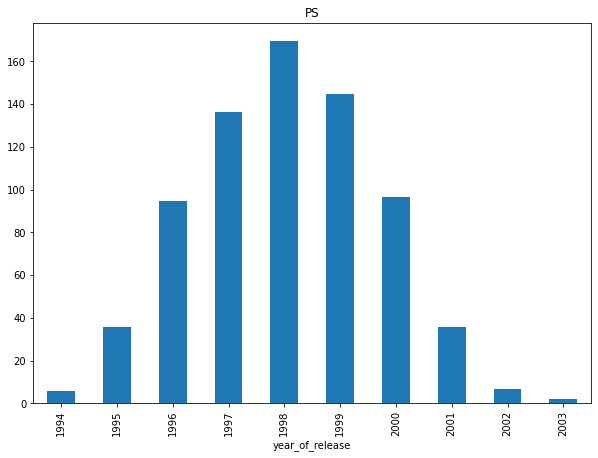

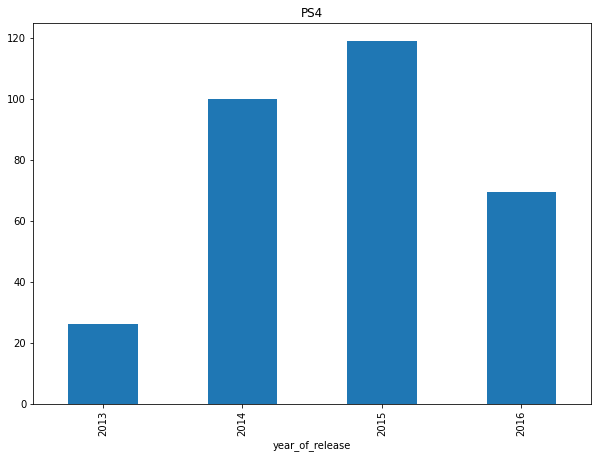

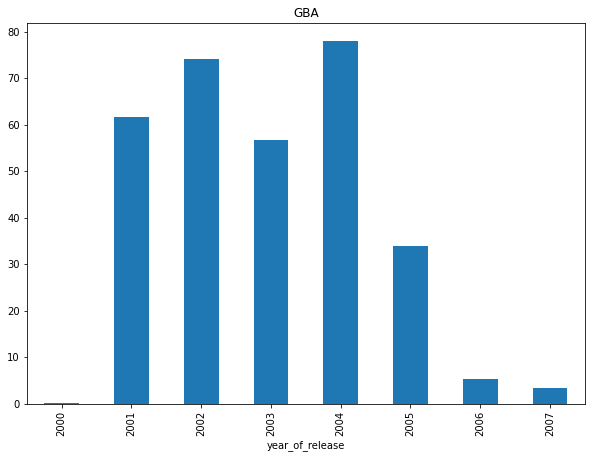

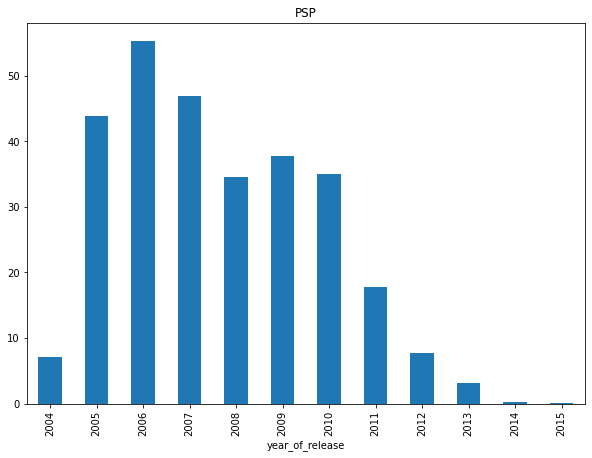

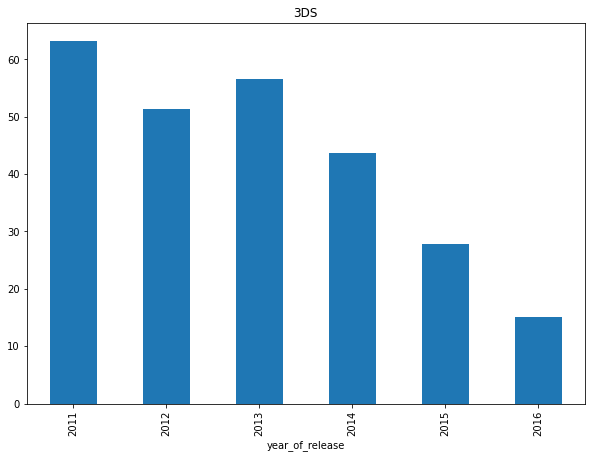

In [19]:
top_platforms = (
data.groupby('platform')['sales'].sum()
    .sort_values(ascending=False).reset_index()
    .head(10)['platform']
)

for platform in top_platforms:
    data[data['platform'] == platform].groupby('year_of_release')['sales'].sum().plot(kind='bar', figsize=(10,7), title=platform)
    plt.show()

Лидерами по продажам являются приставки предыдущих поколений. Данные по ним не являются актуальными. В топе присутствует приставка нового поколения - PS4, данных по которой не так много, но они актуальные. Пк - самая долгоживущая платформа. Характерный период жизни платформы (не считая ПК) - примерно 10 лет.

За актуальный период можно взять последние 5 лет (с 2012 по 2016). Количество игр не сильно уменьшилось за это время, и 5 лет - это половина характерного времени жизни приставок, следовательно в этот период будут учитоваться в основном актуальные платформы.

In [20]:
data_five_years = data[data['year_of_release'] >= 2012]
data_five_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,Undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,Undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


Опять рассмотрим топ платформ по продажам

In [21]:
top_10_five_yeas = data_five_years.groupby('platform')['sales'].sum().sort_values(ascending=False).reset_index().head(10)
top_10_five_yeas

,platform,sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


За эти 5 лет самыми "прибыльными" были PS4 и 3, XBox360, 3DS и XOne (продано больше 100 миллионов копий). Опять рассмотрим продажи такого топа

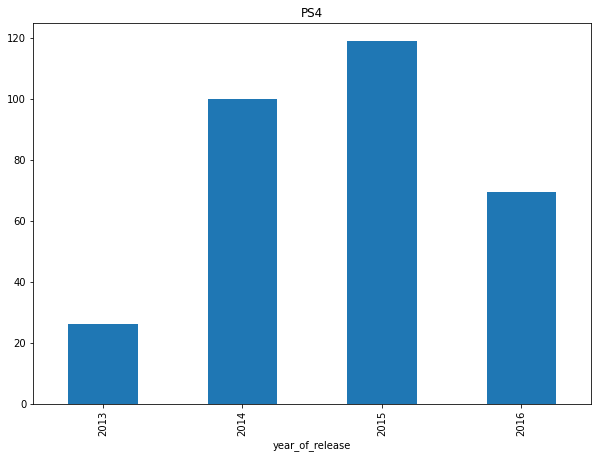

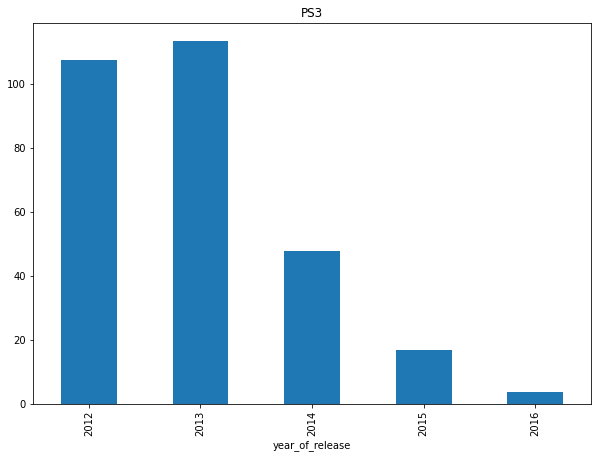

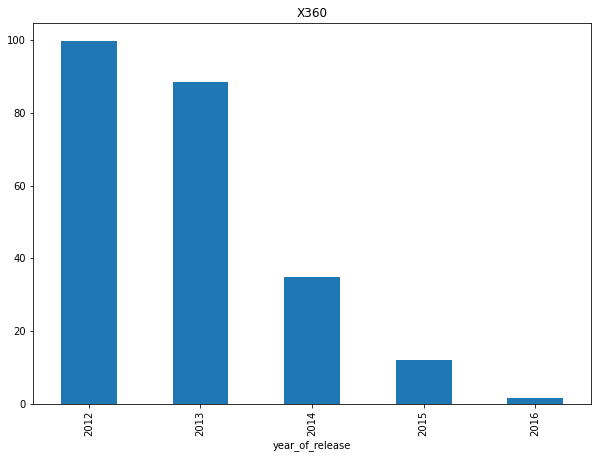

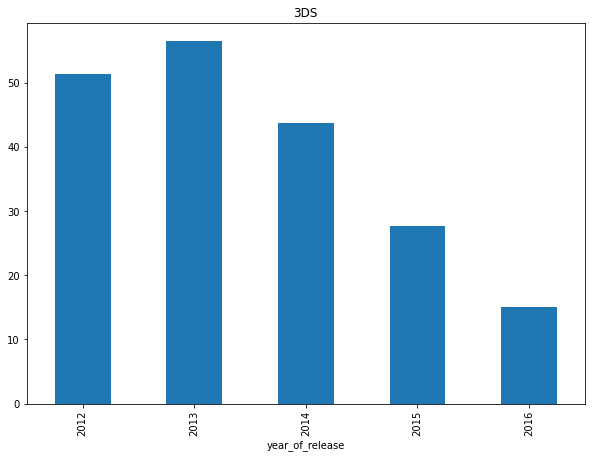

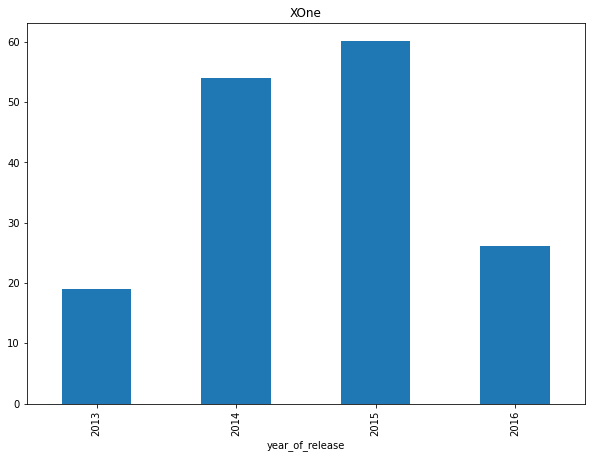

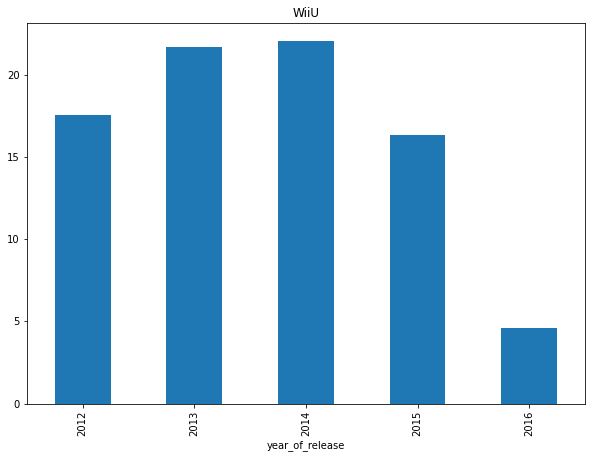

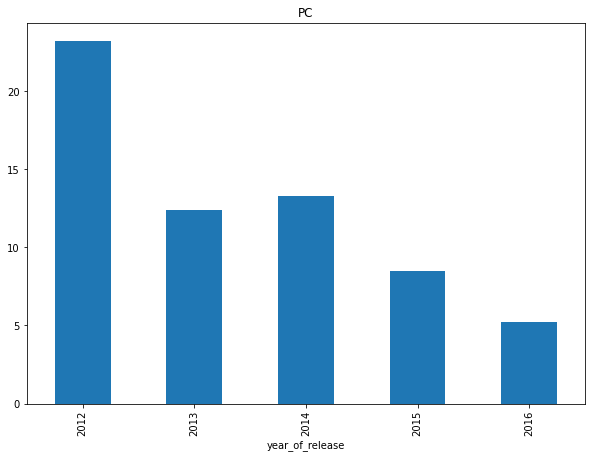

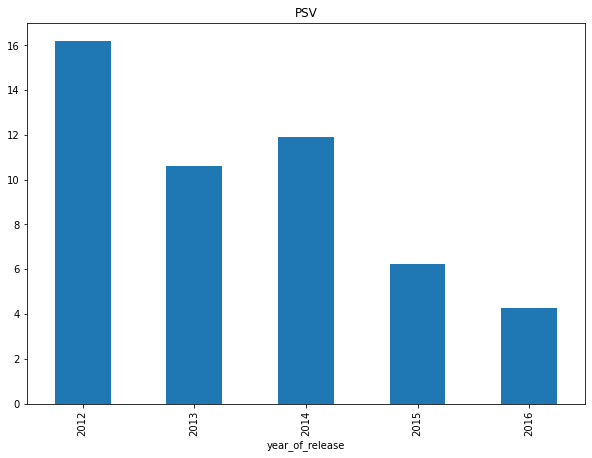

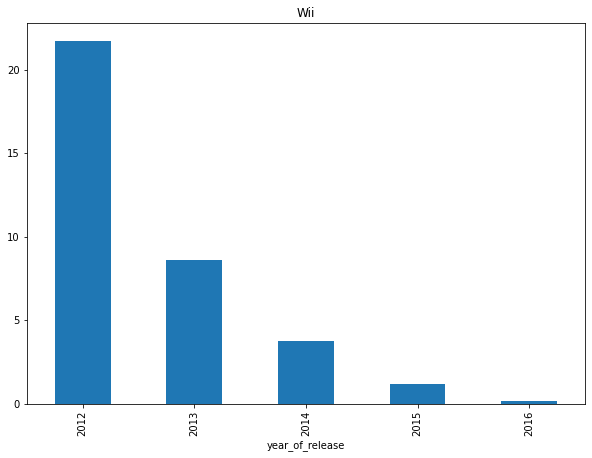

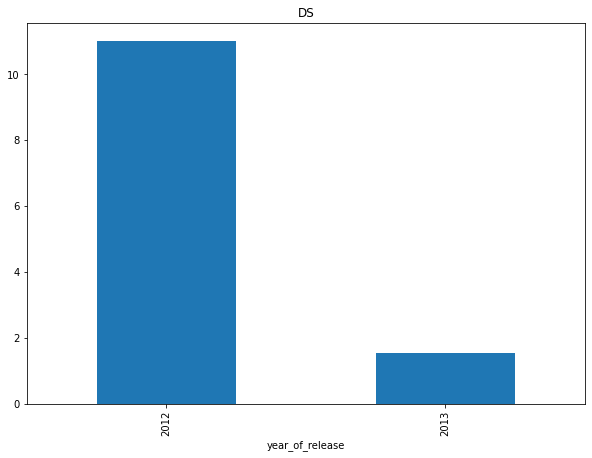

In [22]:
for platform in top_10_five_yeas['platform']:
    (
    data_five_years[data_five_years['platform'] == platform]
        .groupby('year_of_release')['sales'].sum()
        .plot(kind='bar', figsize=(10,7), title=platform)
    )
    plt.show()

PS3, XBOX360 и Wii сдают обороту будучи консолями предыдущего поколения. Однако продажи консолей нового поколения, а так же ПК тоже падают. PS4, XBoxOne и 3DS какое то время еще будут актуальными консолями.

Построим графики с усами по глобальным продажам

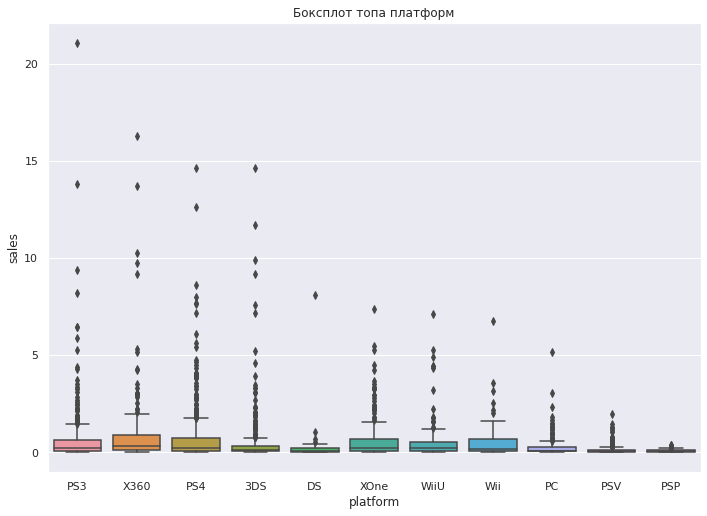

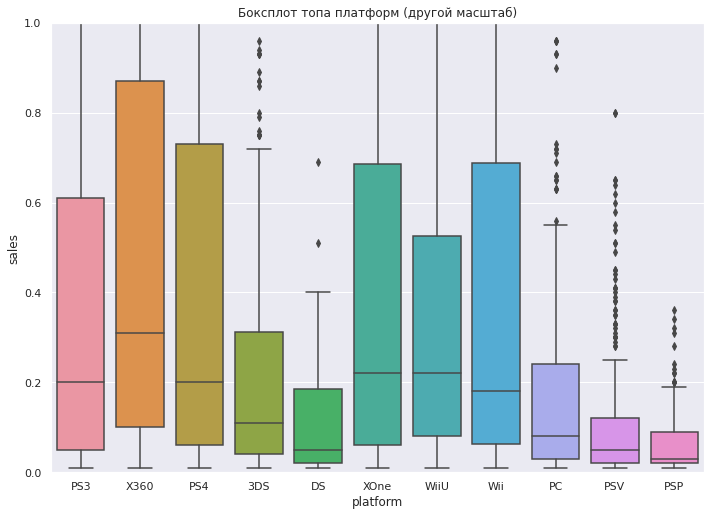

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x='platform', y='sales', data=data_five_years)
plt.title('Боксплот топа платформ')
plt.show()
fig, ax = plt.subplots()
sns.boxplot(x='platform', y='sales', data=data_five_years)
ax.set_ylim((0, 1))
plt.title('Боксплот топа платформ (другой масштаб)')
plt.show()

Чем выше платформа в топе, тем выше продажи выбивающихся игр. Вероятнее всего это связано с тем, что на популярных платформах выпускают больше громких, высокобюджетных хитов. Самое большое медианно значение у xbox360, при этом у него же самый большой размах. Среди топ 5 самая слабая платформа - DS, при этом она даже слабее платформ ниже по списку (значит есть всего несколько хитов, которые составляют подавляющее большинство продаж на этой платформе).

У всех платформ медиана смещена к нижнему квантилю. Это означает, что распределения скошены вправа, значит преобладают игры с большим числом продаж.

### Платформы

Рассмотрим влияние рейтингов на продажи для отдельных платформ из топа.

In [24]:
def sales_from_critic_score(platform: str):
    filtered_data = data_five_years[(data_five_years['platform'] == platform) & (~data_five_years['critic_score'].isna())]
    filtered_data.plot(x='critic_score', y='sales', kind='scatter', color='red',
                       title=f'График зависимости продаж от рейтинга критиков для платформы {platform}')
    cor = filtered_data[['critic_score', 'sales']].corr()['sales'][0]
    print(f'Коэффициент корреляции между продажами и рейтингом критиков равен {cor:.4f}')

def sales_from_user_score(platform: str):
    filtered_data = data_five_years[(data_five_years['platform'] == platform) & (~data_five_years['user_score'].isna())]
    filtered_data.plot(x='user_score', y='sales', kind='scatter', color='red',
                      title=f'График зависимости продаж от рейтинга пользователей для платформы {platform}')
    cor = filtered_data[['user_score', 'sales']].corr()['sales'][0]
    print(f'Коэффициент корреляции между продажами и рейтингом пользователей равен {cor:.4f}')
    

Коэффициент корреляции между продажами и рейтингом критиков равен 0.4066
Коэффициент корреляции между продажами и рейтингом пользователей равен -0.0320


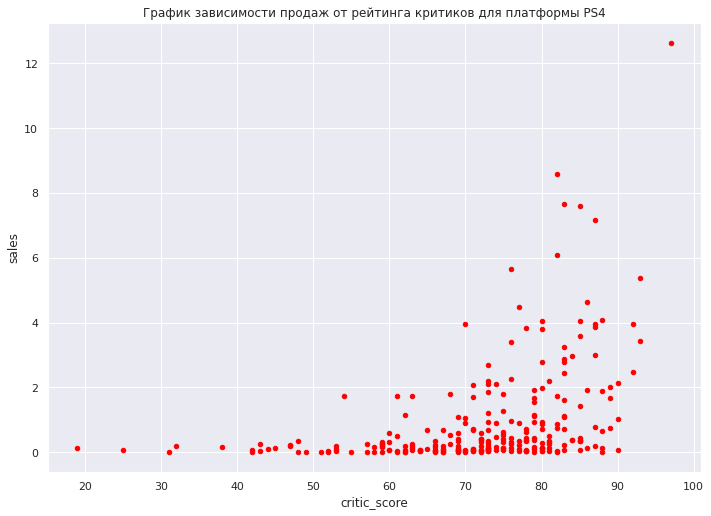

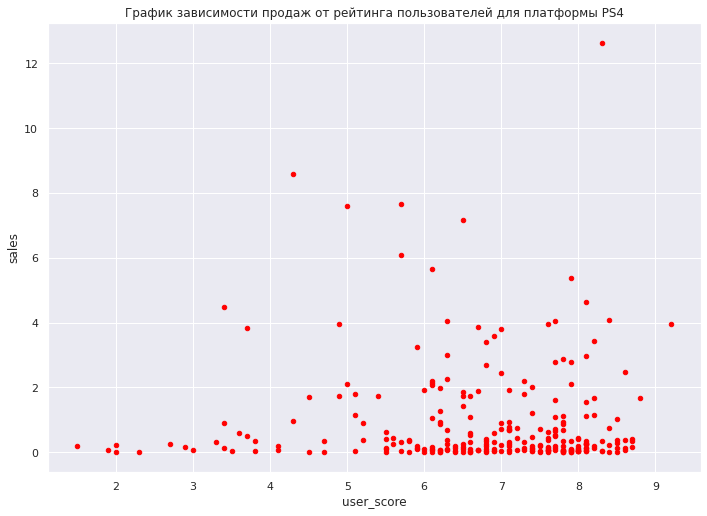

In [25]:
#PS4
sales_from_critic_score('PS4')
sales_from_user_score('PS4')

Коэффициент корреляции между продажами и рейтингом критиков равен 0.3606
Коэффициент корреляции между продажами и рейтингом пользователей равен 0.0062


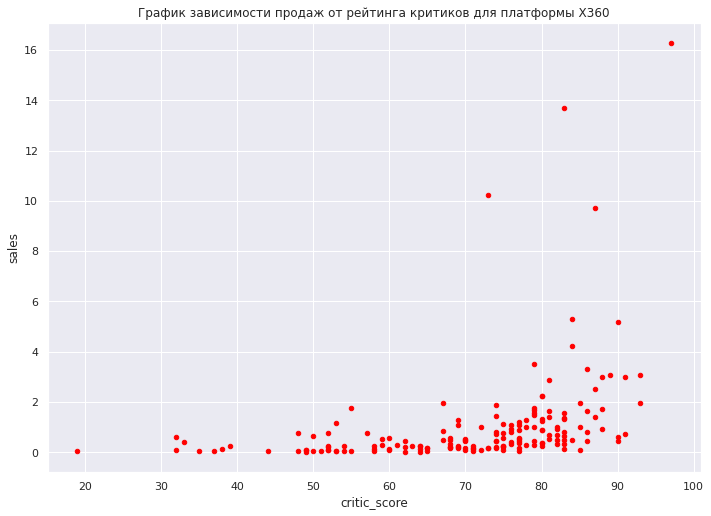

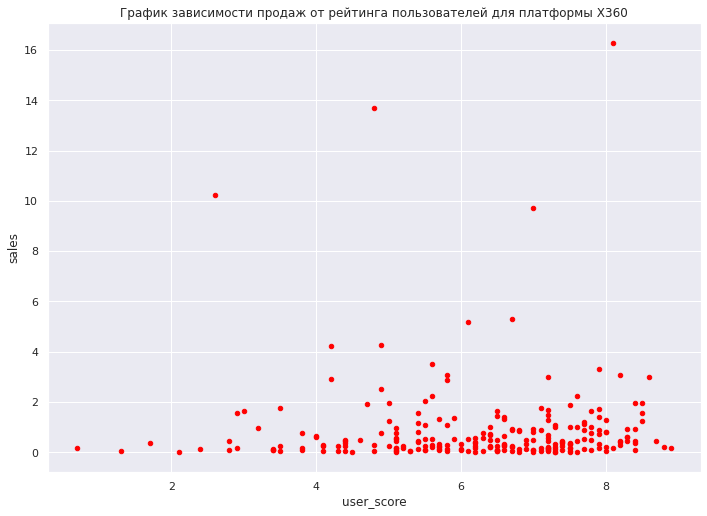

In [26]:
sales_from_critic_score('X360')
sales_from_user_score('X360')

Коэффициент корреляции между продажами и рейтингом критиков равен 0.3315
Коэффициент корреляции между продажами и рейтингом пользователей равен -0.0051


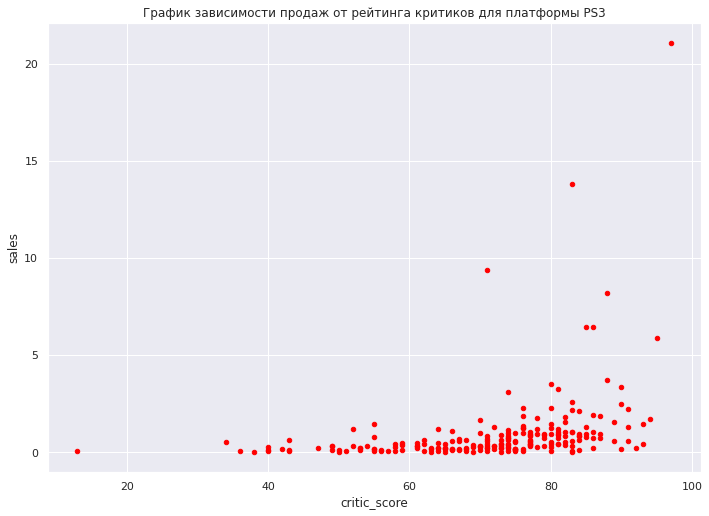

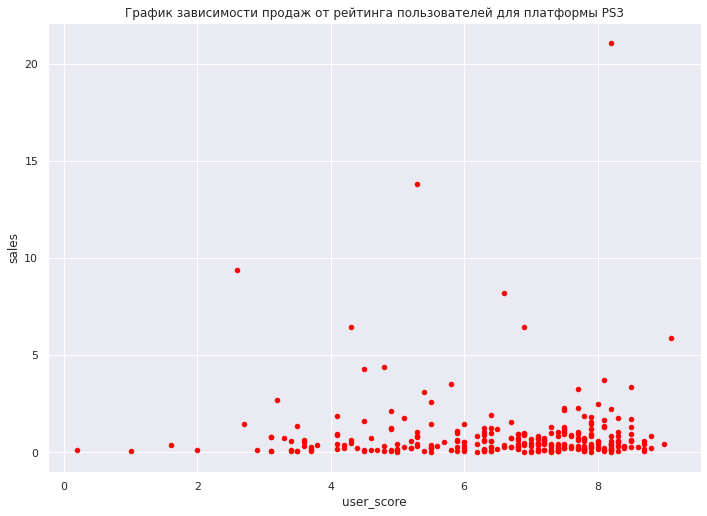

In [27]:
sales_from_critic_score('PS3')
sales_from_user_score('PS3')

**Для топ-3 платформ картина очень похожая - наблюдается слабая зависимость продаж от рейтинга критиков, при этом от рейтинга пользователей продажи не зависят. Чаще всего выбивающиеся гигры получают большие рейтинги, особенно от критиков.**

Коэффициент корреляции между продажами и рейтингом критиков равен 0.3208
Коэффициент корреляции между продажами и рейтингом пользователей равен 0.1976


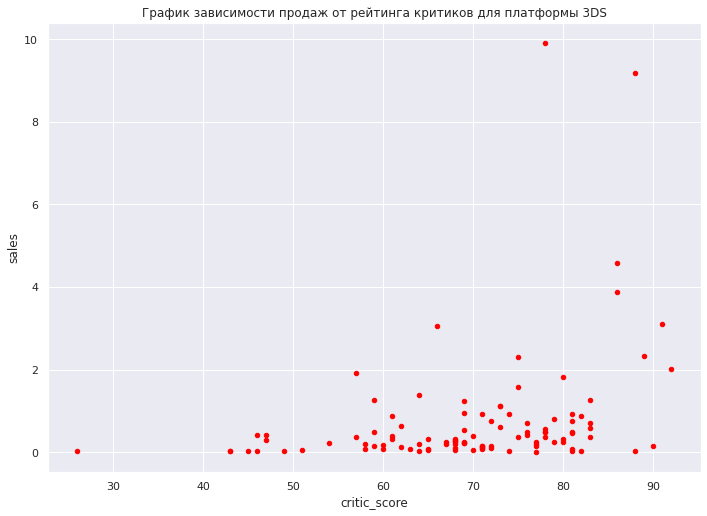

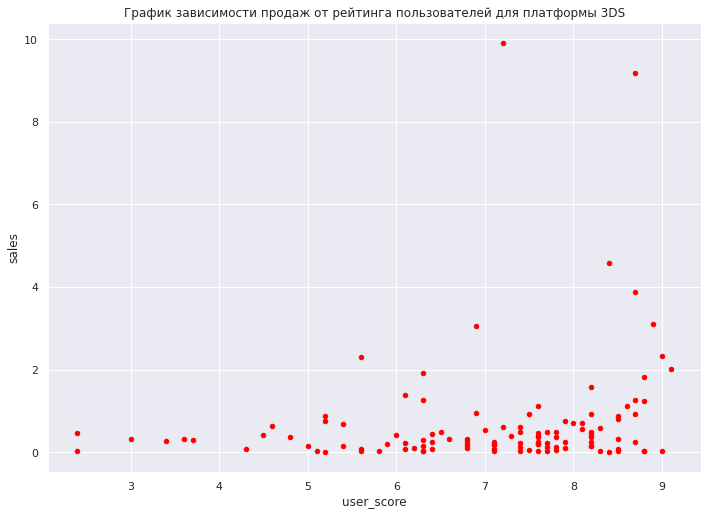

In [28]:
sales_from_critic_score('3DS')
sales_from_user_score('3DS')

**Для 3DS картина уже немного другая. Графики "критиков" и "пользователей" оченб похожи, в обоих случаях наблюдается небольшая корреляция**

Коэффициент корреляции между продажами и рейтингом критиков равен nan
Коэффициент корреляции между продажами и рейтингом пользователей равен 0.8827


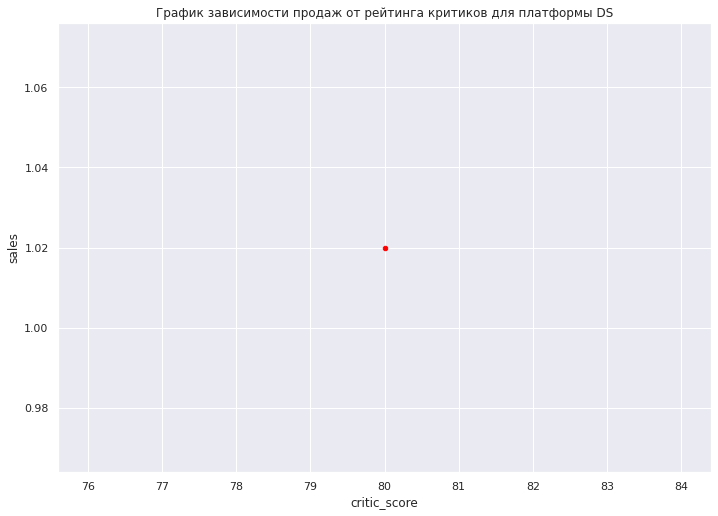

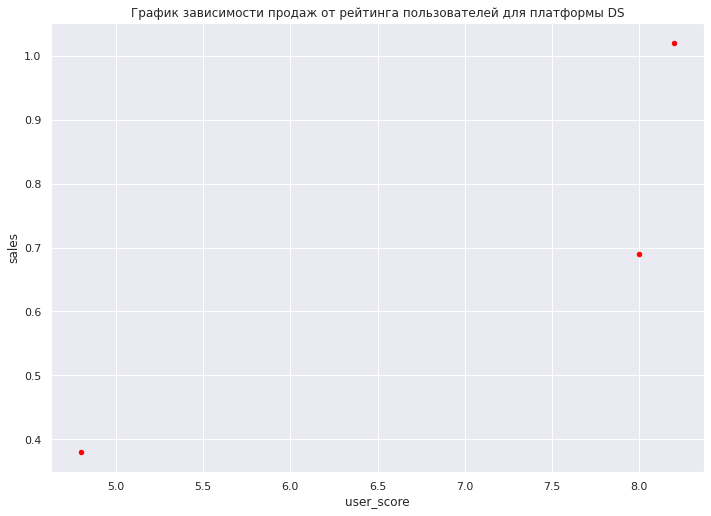

In [29]:
sales_from_critic_score('DS')
sales_from_user_score('DS')

**Слишком мало отзовов**

Для сравнения так же построим график для ПК (самая долгоживущая платформа)

Коэффициент корреляции между продажами и рейтингом критиков равен 0.2372
Коэффициент корреляции между продажами и рейтингом пользователей равен -0.1219


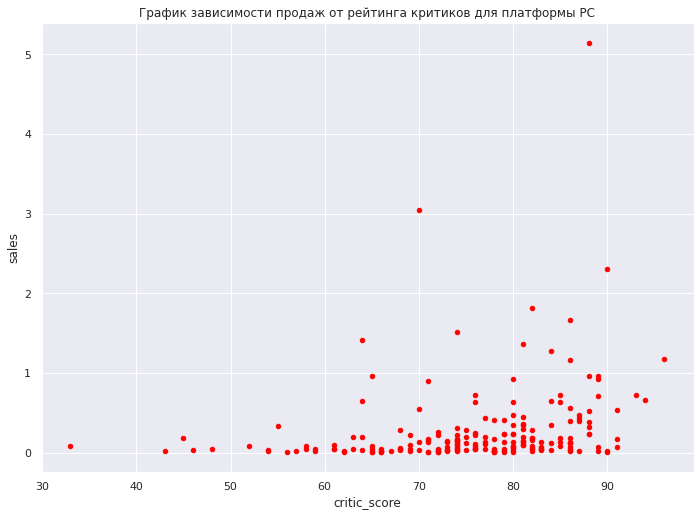

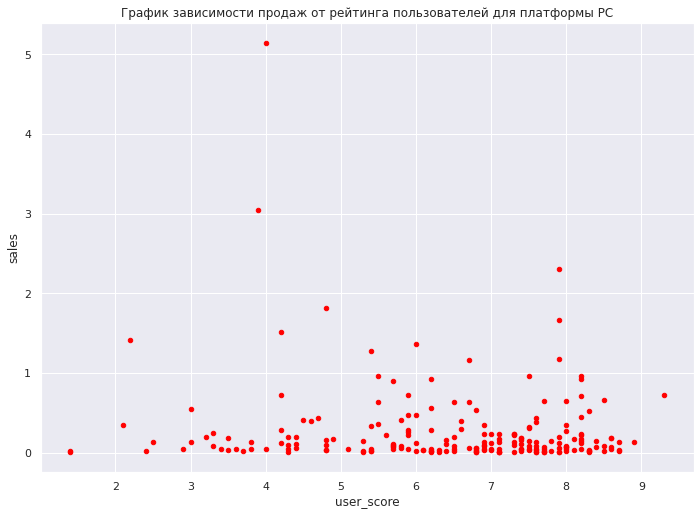

In [30]:
sales_from_critic_score('PC')
sales_from_user_score('PC')

Опять, картина похожа на топ 3.

### Жанры

Рассмотрим распределение игр по жанрам

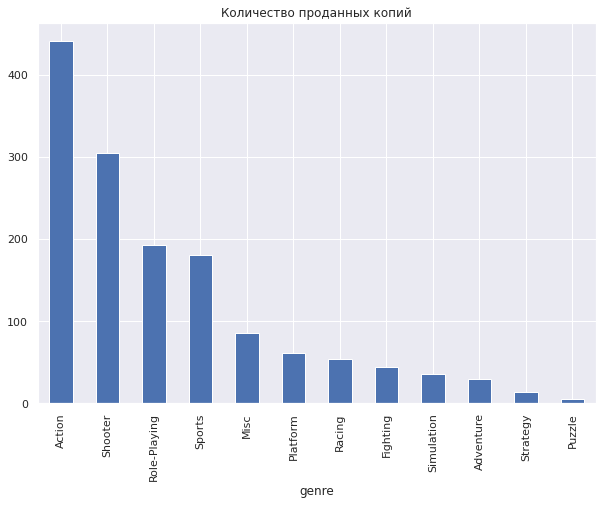

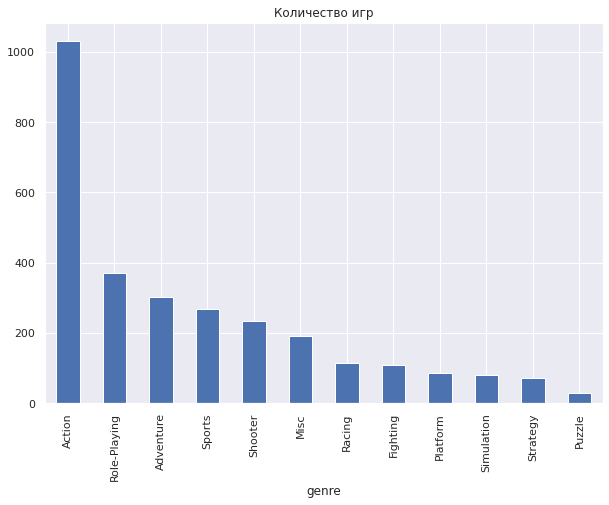

<AxesSubplot:title={'center':'Медианнf продаж'}, xlabel='genre'>

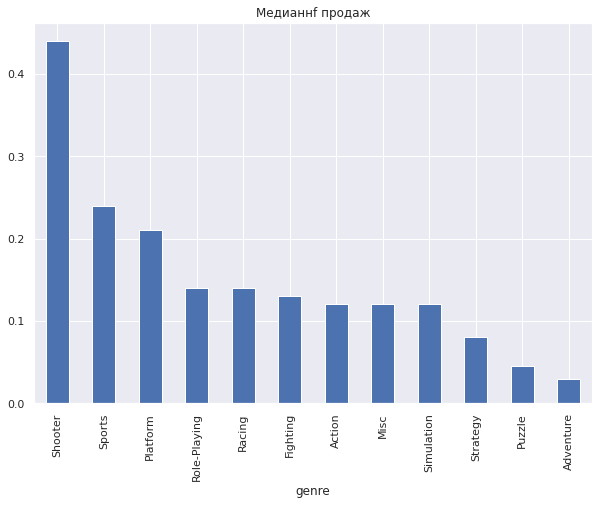

In [31]:
(
data_five_years.groupby('genre')['sales'].sum()
    .sort_values(ascending=False)
    .plot(kind='bar',
          figsize=(10,7),
          title='Количество проданных копий')
)
plt.show()
(
data_five_years.groupby('genre')['sales'].count()
    .sort_values(ascending=False)
    .plot(kind='bar',
          figsize=(10,7),
          title='Количество игр')
)
plt.show()
(
data_five_years.groupby('genre')['sales'].median()
    .sort_values(ascending=False)
    .plot(kind='bar',
          figsize=(10,7),
          title='Медианнf продаж')
)

Самые популярные жанры - это экшн, шутеры, rp, спортивные игры.

Самые неполпулярные - это пазлы, стратегии, приключения

Экшн почти в 100 раз более популярный, чем пазлы, при этом он продался на 140 млн копий больше своего ближайшего конкурента - шутеров.

По количеству игр экшн так же на первом месте, при чем с еще большим отрывом. Пазлы - на последнем месте.

Рассмотрим рспределение продаж игр из топ-3 жанров с обоих сторон

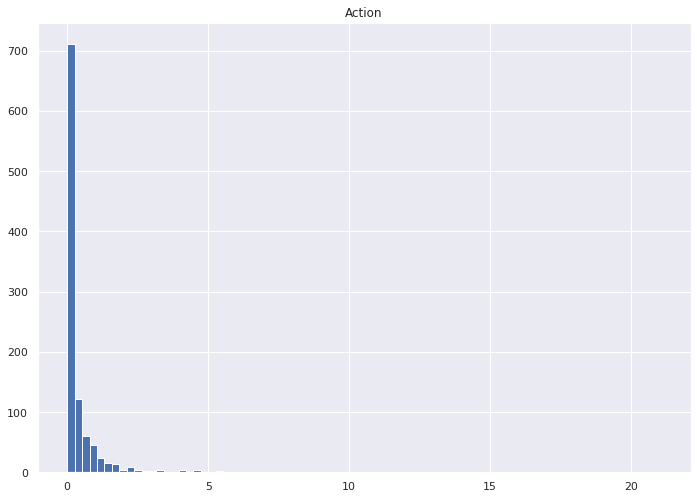

Медиана для жанра Action равна 120 тысяч копий


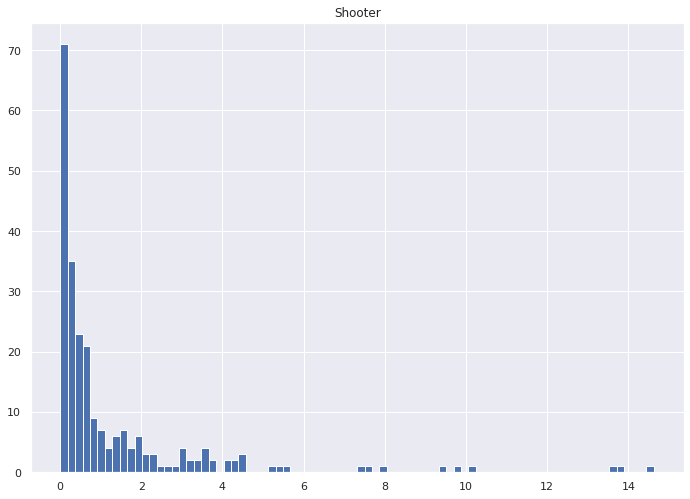

Медиана для жанра Shooter равна 440 тысяч копий


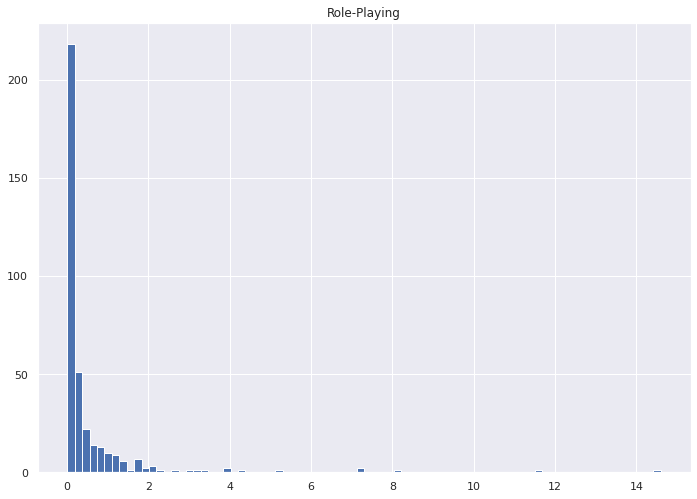

Медиана для жанра Role-Playing равна 140 тысяч копий


In [32]:
# Топ-3 лучших
for genre in ['Action', 'Shooter', 'Role-Playing']:
    data_genre = data_five_years[data_five_years['genre'] == genre]['sales']
    data_genre.hist(bins=80)
    median = data_genre.median()
    plt.title(genre)
    plt.show()
    print(f'Медиана для жанра {genre} равна {int(median * 1000)} тысяч копий')

Подавляющее большинство игр в топе по жанрам имеют очень маленькие продажи (до 2 млн). Половина игр имеет продажи до 500 тысяч. Однако имеется большое количество выбивающихся игр, которые и формируют такие большие продажи всего жанра.

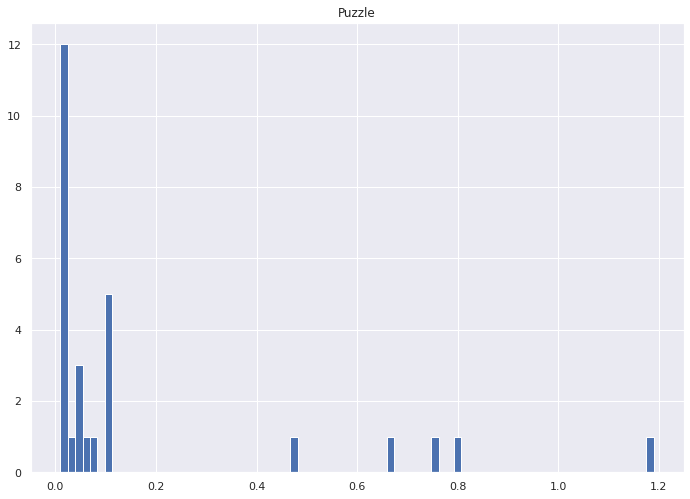

Медиана для жанра Puzzle равна 45 тысяч копий


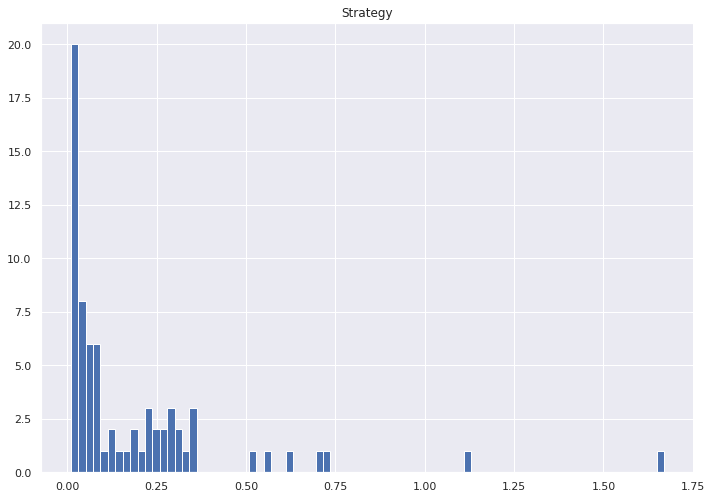

Медиана для жанра Strategy равна 80 тысяч копий


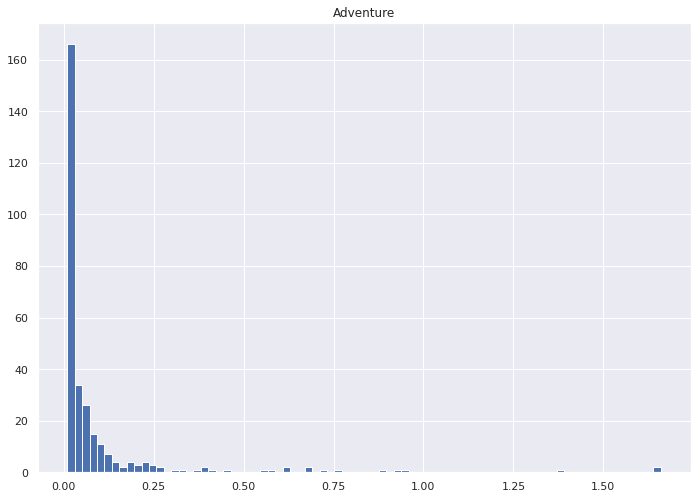

Медиана для жанра Adventure равна 30 тысяч копий


In [33]:
# Топ-3 "худших"
for genre in ['Puzzle', 'Strategy', 'Adventure']:
    data_genre = data_five_years[data_five_years['genre'] == genre]['sales']
    data_genre.hist(bins=80)
    median = data_genre.median()
    plt.title(genre)
    plt.show()
    print(f'Медиана для жанра {genre} равна {int(median * 1000)} тысяч копий')

Тут похожая картина, только даже выбивающиеся значения не продают больше 2 млн копий, а медиана не доходит до 100 тысяч.

## Портрет пользователя по регионам

In [34]:
# Составляет топ платформ в регионе. (Топ по продажам и топ по доле продаж от общих продаж)
def top_platform(region: str):
    platform_port = data_five_years.groupby('platform').aggregate({region + '_sales': 'sum', 'sales': 'sum'})
    platform_port[region + '_share'] = platform_port[region + '_sales'] / platform_port['sales']
    
    (
    platform_port[region + '_sales']
        .sort_values(ascending=False).head(5)\
        .plot(kind='bar', figsize=(10, 7), title=f'Топ-5 платформ в регионе {region}')
    )
    
    plt.show()
    
    (
    platform_port[region + '_share']
        .sort_values(ascending=False).head(5)\
        .plot(kind='bar', figsize=(10, 7), title=f'Топ-5 платформ по доле за регион {region}')
    )

# Составляет топ жанров в регионе. (Топ по продажам и топ по доле продаж от общих продаж)
def top_genre(region: str):
    genre_port = data_five_years.groupby('genre').aggregate({region + '_sales': 'sum', 'sales': 'sum'})
    genre_port[region + '_share'] = genre_port[region + '_sales'] / genre_port['sales']
    
    (
    genre_port[region + '_sales']
        .sort_values(ascending=False).head(5)\
        .plot(kind='bar', figsize=(10, 7), title=f'Топ-5 жанров в регионе {region}')
    )
    
    plt.show()
    
    (
    genre_port[region + '_share']
        .sort_values(ascending=False).head(5)\
        .plot(kind='bar', figsize=(10, 7), title=f'Топ-5 жанров по доле за регион {region}')
    )

# Проверяет влияние возростного рейтинга на продажи
def rating_region(region: str):
    rating_port = data_five_years.groupby('rating').aggregate({region + '_sales': ['sum', 'mean']})
    rating_port.columns = ['sales', 'mean_sales']
    
    (
    rating_port['sales']
        .sort_values(ascending=False)
        .plot(kind='bar',
              figsize=(10, 7),
              title=f'Продажи по рейтингам в регионе {region}')
    )
    plt.show()
    (
    rating_port['mean_sales']
        .sort_values(ascending=False)
        .plot(kind='bar',
              figsize=(10, 7),
              title=f'Средние продажи одной игры по рейтингам в регионе {region}')
    )

### Регион NA

#### Топ 5 платформ

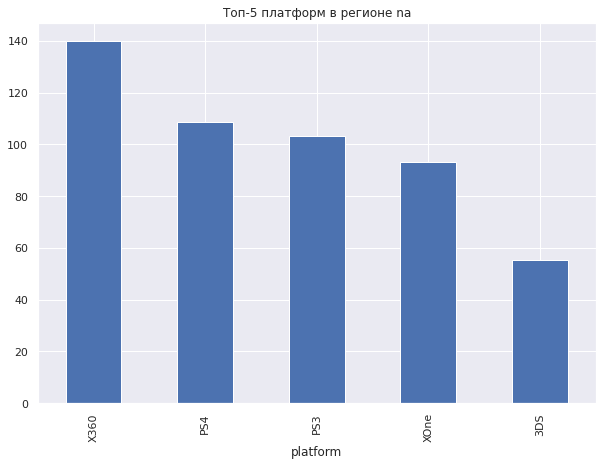

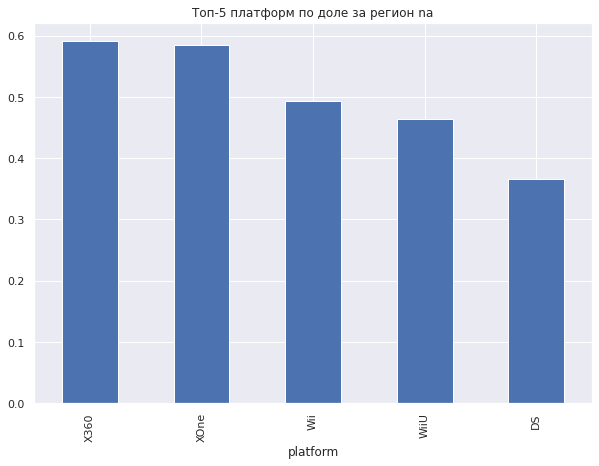

In [35]:
top_platform('na')

В Северной Америке XBox360 является самой популярной платформой. PS4 и 3 идут следом, XBox нового поколения - на 4 месте. На последнем 3DS. Доля от продаж по всем регионам отчилается: XBox360 все еще на первом месте - больше половины продаж. XBoxOne на втором, при этом доля практически такая же. Play station в этом топе отсутствует.

#### Топ 5 жанров

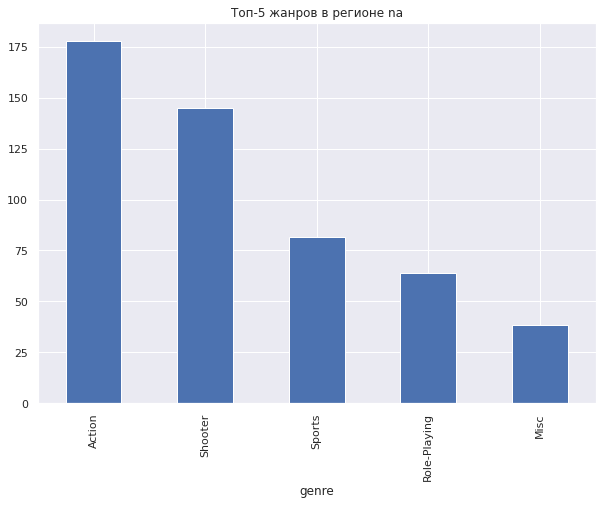

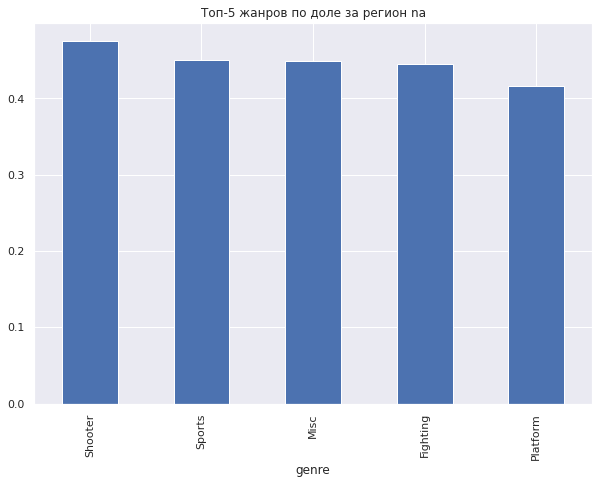

In [36]:
top_genre('na')

Экшн - на первом месте по продажам. При этом он отсутсвует в топе по доле продаж на регион. Стоит так же обратить внимание на шутеры, они на втором месте по продажам и на первом по доле. Все жанры топа по доле очень хорошо продаются в Северной Америке, продажи составляют чуть ниже 50% от общих продаж

#### Влияние рейтинга

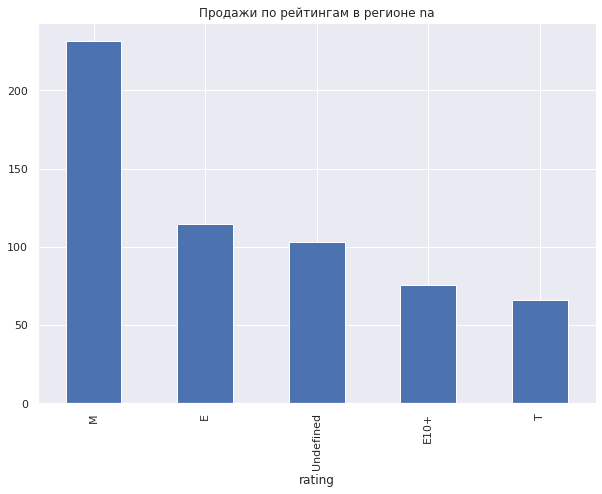

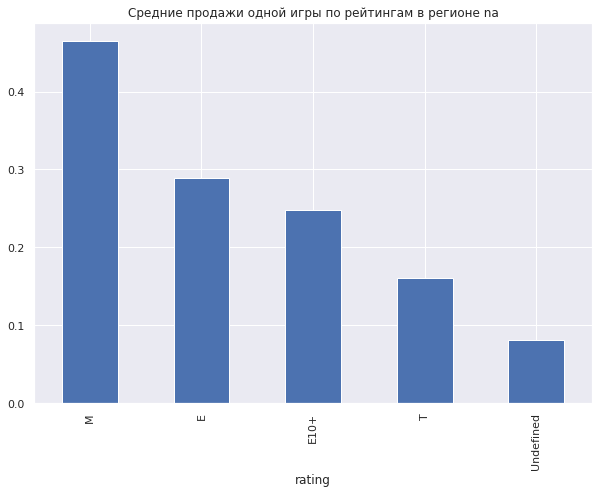

In [37]:
rating_region('na')

Влияние есть. Самые продаваемые - игры с рейтингом M. Е - на втором месте с большим отрывом.

### Регион EU

#### Топ 5 платформ

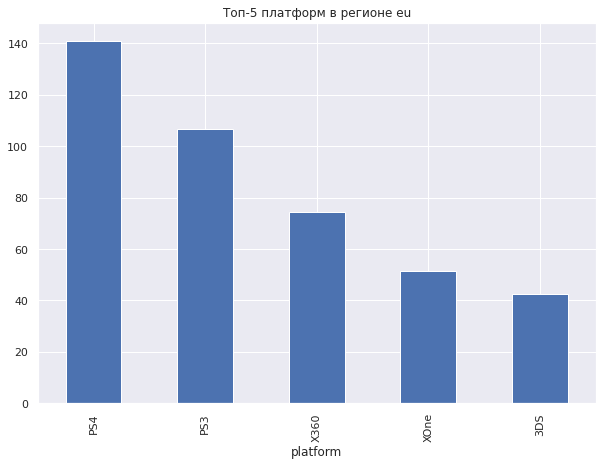

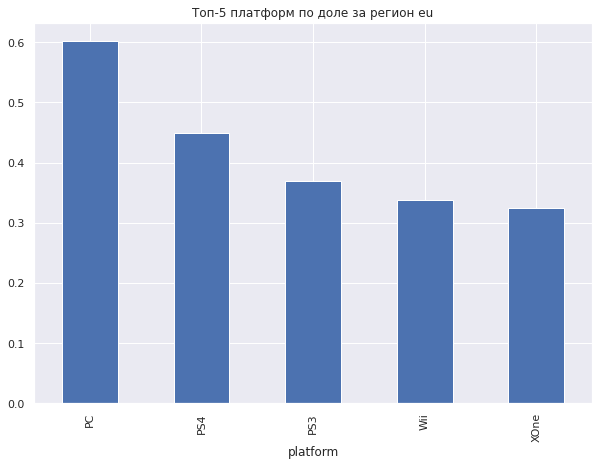

In [38]:
top_platform('eu')

В этом регионе стоит обратить внимание на серию Playstation. Игры на них самые продоваемые, плюс они в топе доли от общих продаж. ПК так же присутствует в этом топе - 60% продаж игра на ПК приходится на Европу.

#### Топ 5 жанров

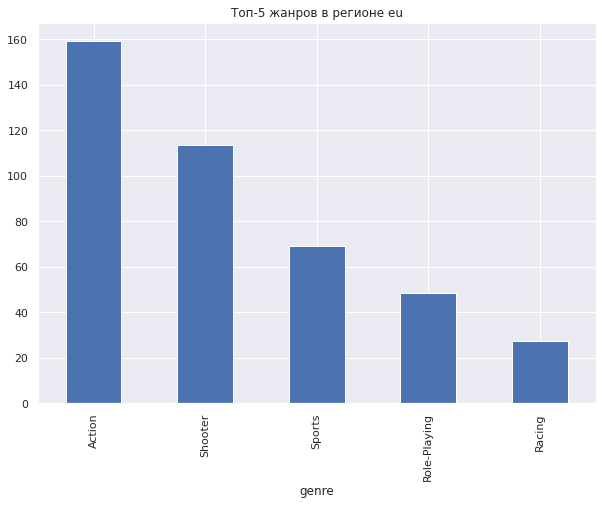

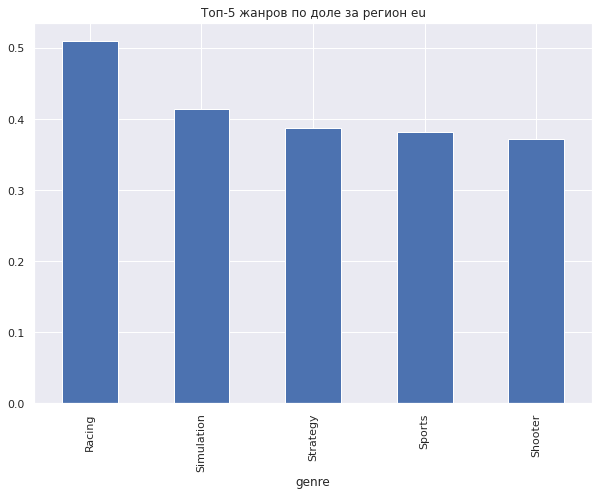

In [39]:
top_genre('eu')

Экшн на первом месте по продажам. Гонки - на пятом месте. При этом гонки лучше всего продаются именно в этом регионе.

#### Влияние рейтинга

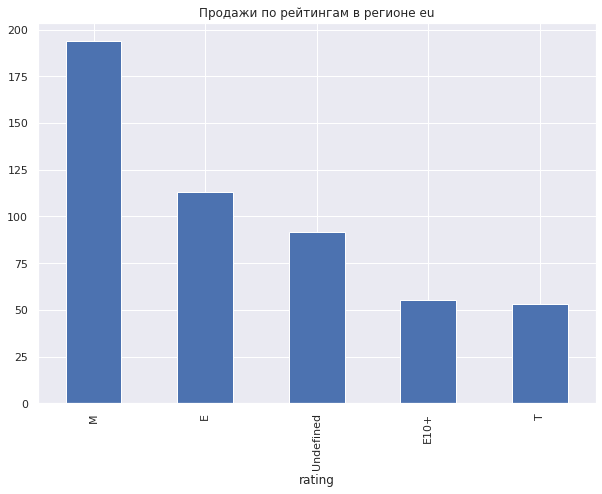

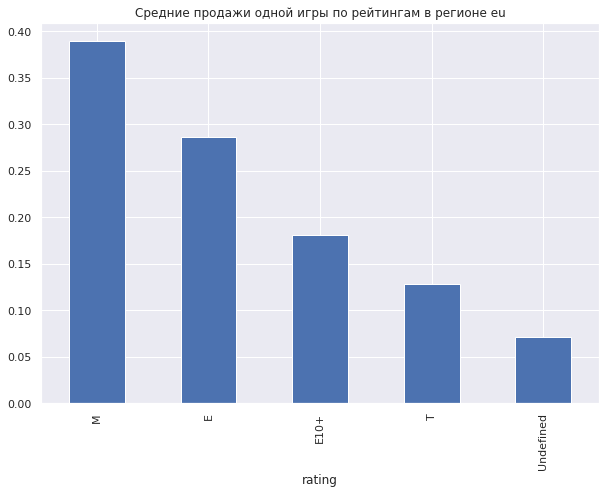

In [40]:
rating_region('eu')

Картина идентична региону NA

### Регион JP

#### Топ 5 платформ

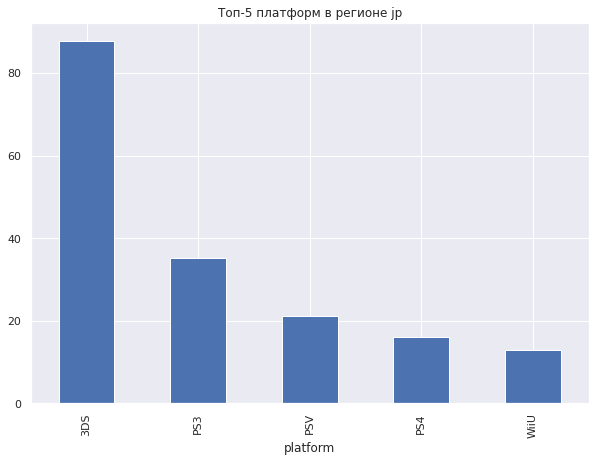

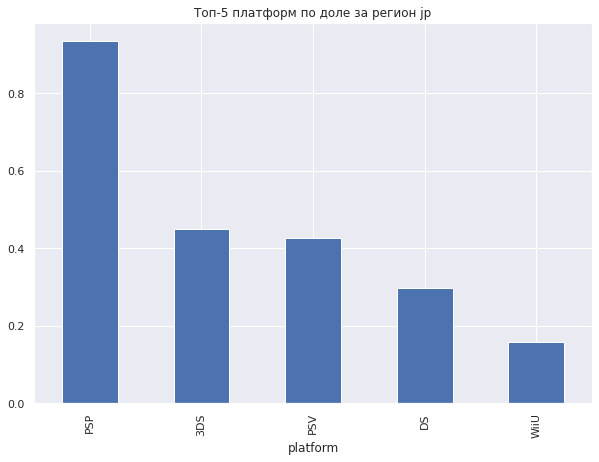

In [41]:
top_platform('jp')

В Японии следует обратить внимание на 3DS, поскольку игры на ней - самые продоваемые. Подавляющее число продаж игр на PSP приходится на Японию.

#### Топ 5 жанров

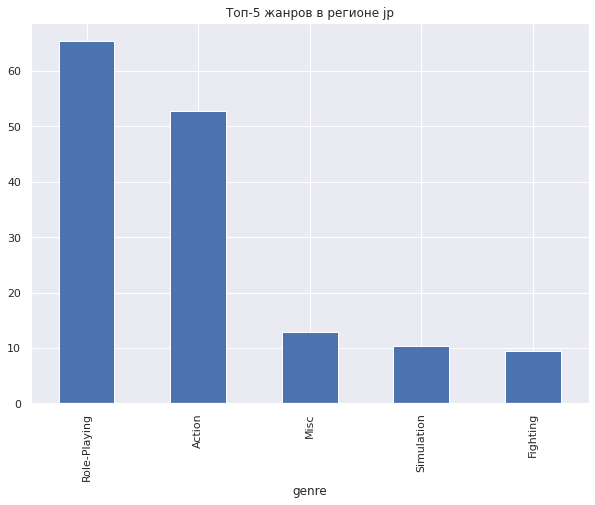

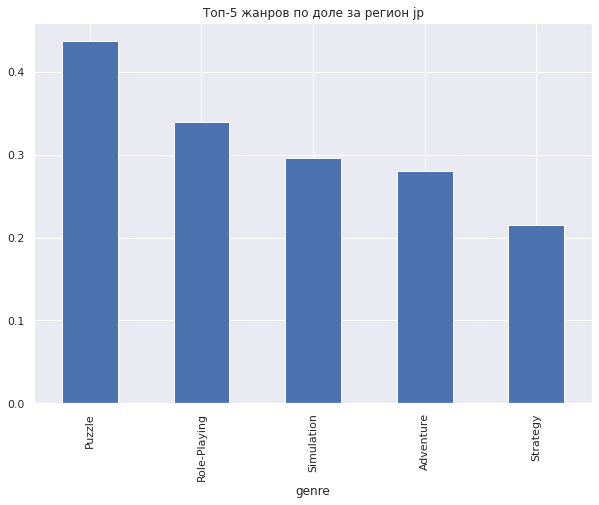

In [42]:
top_genre('jp')

В Японии Экшн на втором месте, на первом же ролевые игры. Эти 2 жанра сильно выбиваются от отслаьных. Пазлы лучше всего продаются в этом регионе, ролевые игры же на втором месте, чуть выше 30% продаж.

#### Влияние рейтинга

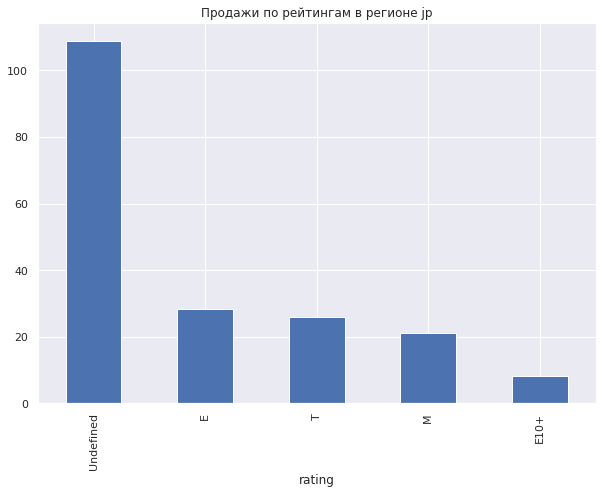

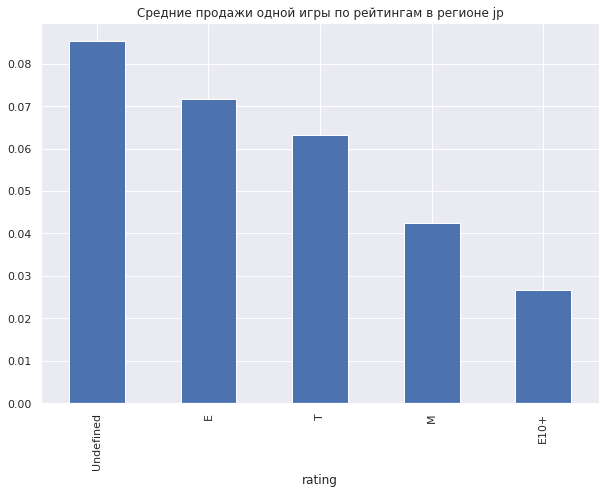

In [43]:
rating_region('jp')

Картина значительно отличается от Америки и Европы. Во первых доминируют игры с неопределенным жанром. Вероятнее всего возростной рейтинг им был назначен по другой системе. Во вторых, даже если отбросить игры с неопределенным рейтингом, игры с рейтингом М в Японии на третьем месте, больше всего продаж у игр с рейтингом Е и Т

## Проверка гипотез

In [44]:
def check_hypothesis(sample_1, sample_2, alpha):
    result = st.ttest_ind(sample_1, sample_2)

    print(f'p = {result.pvalue}')
    if alpha > result.pvalue:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Вероятнее всего нулевая гипотеза верна')

### Средний пользовательский рейтинг игра на ПК и XBoxOne

Проверим гипотезу *"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"*. Для это сформилируем нулевую и альтернативную гипотезы:

$H_0$: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

$H_1$: Средние пользовательские рейтинги платформ Xbox One и PC разные

Для проверки гипотезы вопспользуемся p-значением. Возьмем пороговое значение $\alpha = 0.05$

In [45]:
sample_1 = data_five_years[(data_five_years['platform'] == 'XOne') & (~data_five_years['user_score'].isna())]['user_score']
sample_2 = data_five_years[(data_five_years['platform'] == 'PC') & (~data_five_years['user_score'].isna())]['user_score']

check_hypothesis(sample_1, sample_2, 0.05)

p = 0.5535080500643661
Вероятнее всего нулевая гипотеза верна


Нулевая гипотеза скорее всего верна, значит средние статистически значимо не различаются

### Средние пользовательские рейтинги жанров Action и Sports разные.

Для удобства сформулируем нулевую и альтернативную гипотезы так:

$H_0$: Средние рейтинги ползователей жанров экшн и спорт одинаковые

$H_1$: Средние рейтинги пользователей жанров экшн и спорт разные

Возьмем тот же $\alpha$

In [46]:
sample_1 = data_five_years[(data_five_years['genre'] == 'Action') & (~data_five_years['user_score'].isna())]['user_score']
sample_2 = data_five_years[(data_five_years['genre'] == 'Sports') & (~data_five_years['user_score'].isna())]['user_score']

check_hypothesis(sample_1, sample_2, 0.05)

p = 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Можно с большой уверенностью отвергнуть нулевую гипотезу. Средние рейтингов жанров экшн и сопрт статичтически значимо отличаются

## Выводы



Была проведена предобработка данных. Были замечены следующие недостатки в датасете:
- Слова в названиях столбцов начинались с большой буквы
- Стобцы с годом выпуска и оценками критиков были неправильного типа
- Присутсвуют пропуски:
    - в столбце с названиями нескольких игр
    - в столбце с жанром нескольких игр
    - в столбце с годом выпуска (человеческий фактор)
    - в столбцах с рейтингами от пользователей и критиков (вероятнее всего это связано с малой популярностью игры)
    - в стобце с возростным рейтингом (вероятнее всего связано с тем, что некоторым играм выставляют рейтинг по другой системе)

Добавлен столбец с общими продажами игр по всем регионам

Был проведен анализ данных:
- В результате анализа продаж по годам, а так же продаж самых популярных платформ, был выбран актуальный период, который максимально подходит для предсказания на 2017 год: **последние 5 лет**
- Было продемонстрировано, что игры на консолях нового поколения (XBox One, Playstation 4) - самые продоваемые. Консоли старого поколения сбавляют обороты в последние годы. ПК также демонсрирует значительное падение в числе продаж.
- Чем выше платформа в топе, тем выше продажи выбивающихся игр. Вероятнее всего это связано с тем, что на популярных платформах выпускают больше громких, высокобюджетных хитов. Самое большое медианно значение у xbox360, при этом у него же самый большой размах квантилей. Среди топ 5 самая слабая платформа - DS, при этом она даже слабее платформ ниже по списку (значит есть всего несколько хитов, которые составляют подавляющее большинство продаж на этой платформе). У всех платформ медиана смещена к нижнему квантилю. Это означает, что распределения скошены вправа, значит преобладают игры с большим числом продаж.
- Для большинства платформ из топа по продажа свойственно то, что число продаж имеет слабую прямую зависимость от рейтинга критиков. При этом от рейтинга пользователей такой зависимости не наблюдается. Есть и исключения, например 3DS, для которой коэффициент корреляции между продажами и рейтингом пользователей положительный, достаточно больше нуля, но небольшой.
- По количеству продаж и игр - экшн на первом месте. При этом пазлы - на последнем. Также стоит обратить внимание на ролевые игры, приключения, спортивные игры. По медианному значению продаж Шутеры на первом месте, так же выделяются платформеры, которые на третьем месте в таком топе.
- При рассмотрения распределения игр в жанрах наблюдается одинаковая картина: продажи большей части игр ниже 500 тысяч копий. Всегда есть выбивающиеся значения, продажи с таких игр и формируют общие продажи всего жанра.

Были построены портреты пользователя каждого региона:
- NA
    - В Северной Америке стоит обратить внимание на серию приставок XBox. PlayStation Так же входит в топ платформ по продажам
    - Экшн - на первом месте по продажам. При этом он отсутсвует в топе по доле продаж на регион. Стоит так же обратить внимание на шутеры, они на втором месте по продажам и на первом по доле. Все жанры топа по доле очень хорошо продаются в Северной Америке, продажи составляют чуть ниже 50% от общих продаж
    - Возростной рейтинг влияет на продажи, самые популярные игры с рейтингом М. Рейтинг Е на втором месте
- EU
    - В этом регионе стоит обратить внимание на серию Playstation. Игры на них самые продоваемые, плюс они в топе доли от общих продаж. ПК так же присутствует в этом топе - 60% продаж игра на ПК приходится на Европу.
    - Экшн на первом месте по продажам. Гонки - на пятом месте. При этом гонки лучше всего продаются именно в этом регионе.
    - Картина возростного рейтинга аналогична региону NA
- JP
    - В Японии следует обратить внимание на 3DS, поскольку игры на ней - самые продоваемые. Подавляющее число продаж игр на PSP приходится на Японию.
    - В Японии Экшн на втором месте, на первом же ролевые игры. Эти 2 жанра сильно выбиваются от отслаьных. Пазлы лучше всего продаются в этом регионе, ролевые игры же на втором месте, чуть выше 30% продаж.
    - Картина значительно отличается от Америки и Европы. Во первых доминируют игры с неопределенным жанром. Вероятнее всего возростной рейтинг им был назначен по другой системе. Во вторых, даже если отбросить игры с неопределенным рейтингом, игры с рейтингом М в Японии на третьем месте, больше всего продаж у игр с рейтингом Е и Т

Были проверены 2 гипотезы (с использованием р-критерия, пороговое значение - 5%):
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
    - Нет оснований полагать, что нулевая гипотеза не верна.
- Средние пользовательские рейтинги жанров Action и Sports разные (нулевая гипотеза сформулирована так: средние рейтинги равны):
    - Принять нулевую гипотезу не получается